In [85]:
from tqdm import tqdm
import json
import torch
from transformers import PreTrainedTokenizerFast
import pytorch_lightning as pl
import os
import pandas as pd

In [72]:
file = '1cycle_2/clue_summary_result221014.json'
with open(file,'r') as fr:
    jdata = json.load(fr)

In [73]:
len(jdata)

1011

In [74]:
from Summary_bart import summary
from rouge_score import rouge_scorer

In [75]:
class a:
    def __init__(self):
        self.learning_rate = 5e-5
    def learning_rate(self):
        return self.learning_rate
args = a()

summary_model = summary(args)
tokenizer = PreTrainedTokenizerFast.from_pretrained('hyunwoongko/kobart')

In [76]:
summary_model.load_state_dict(torch.load('./summary/b16_lr5e-5/lightning_logs/version_1/checkpoints/checkpoints_epoch=84.ckpt')['state_dict'])

<All keys matched successfully>

In [77]:
os.environ['CUDA_VISIBLE_DEVICES']='1'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [90]:
score = []
summary_model.model.eval().to(device)
for i in tqdm(range(100)):
    #random.seed(0)
    result = jdata[i]['refine_data'] #data['sentences'][i][0]
    # print('input:',result)
    # print('--------------------')
    # print('label: ',jdata[i]['summary'])
    # print('--------------------')
    inputs = result
    #label_token = tokenizer(jdata[i]['summary'])['input_ids']
    
    #print(inputs)
    batch = tokenizer(inputs, return_tensors='pt', max_length=1024, truncation=True)
    #print('length:',len(batch['input_ids'][0]))
    len_sum = int(len(batch['input_ids'][0])*0.3)
    #print(len_sum)
    # print(batch['input_ids'].shape)
    batch = batch.to(device)
    generated_ids = summary_model.model.generate(batch['input_ids'],max_length=len_sum)#.squeeze().tolist()#, num_beams=2, max_length=1024)#, no_repeat_ngram_size=2)
    result = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)
    # print('--------------------')
    # # print('len_output:',len(generated_ids[0]))
    # print('output: ',result[0])
    # print('--------------------')
    
    scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True, tokenizer = tokenizer)
    scores = scorer.score(jdata[i]['summary'],result[0])
    #print(scores)
    # print(label_token)
    # print(generated_ids)
    score.append(scores['rougeL'][2]*100)

100%|██████████| 100/100 [01:15<00:00,  1.33it/s]


In [91]:
print(sum(score)/len(score))

28.130070521025218


In [92]:
max(score), min(score)

(90.09009009009009, 2.0338983050847457)

array([[<AxesSubplot:title={'center':'rouge-l f1 score'}>]], dtype=object)

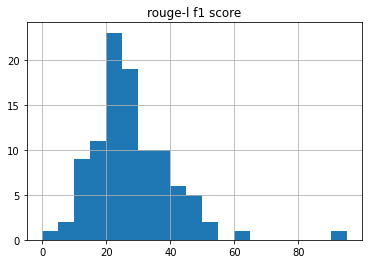

In [96]:
df = pd.DataFrame({'rouge-l f1 score':score})
df.hist(bins=range(0,100,5))

In [130]:
df[df['rouge-l f1 score']<15]

,rouge-l f1 score
17,10.383747
20,7.083333
21,12.873563
46,11.204482
50,14.285714
66,14.795918
68,12.068966
71,14.592275
84,14.893617
88,12.676056


In [134]:
#높게 : 36번, 90번
#낮게 : 96번, 17번
summary_model.model.eval().to(device)
i= 17 #random.seed(0)
result = jdata[i]['refine_data'] #data['sentences'][i][0]
print('input:',result)
print('--------------------')
print('label:',jdata[i]['summary'])
print('--------------------')
inputs = result
#label_token = tokenizer(jdata[i]['summary'])['input_ids']

#print(inputs)
batch = tokenizer(inputs, return_tensors='pt', max_length=1024, truncation=True)
#print('length:',len(batch['input_ids'][0]))
len_sum = int(len(batch['input_ids'][0])*0.3)
# print(len_sum)
batch = batch.to(device)
generated_ids = summary_model.model.generate(batch['input_ids'],max_length=len_sum)#.squeeze().tolist()#, num_beams=2, max_length=1024)#, no_repeat_ngram_size=2)
result = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)
# print('--------------------')
# print('len_output:',len(generated_ids[0]))
print('output:',result[0])
print('rouge-l f1 score:',df.iloc[i].item())
print('--------------------')


input: <h1>요 약</h1><p>전력시스템의 신뢰성을 보장하며 분산전원의 수용성을 높이기 위해 IEEE 1547 과 같은 표준을 개정하여 분산전원의 계통 연계기준을 강화하고 있다. 본 논문은 이러한 표준을 준수하는 IEEE 1547-2018기반의 스마트 인버터 기능의 제어 알고리즘을 제안하고, 스마트 인버터 기술의 검증을 위해 구축한 Power HiLS 기반의 테스트 플랫폼을 소개한다. 스마트 인버터 기능 중 Volt-var 제어와 Frequency-watt 제어 알고리즘은 상호운용성 표준을 준수하도록 해당 기능의 curve를 상위로부터 설정할 수 있도록 하며, 각 기능의 Enable 신호 시점을 상위 지령에 따라 제어할 수 있도록 하였다. 표준에 따라 Power HILS 테스트 플랫폼을 통해 Volt-var 제어와 Frequency-watt 제어에 대한 형식시험을 수행하였고, 명시된 표준 형식시험을 전부 만족함을 측정 결과를 통해 검증하였다. </p><h1>Ⅰ. 서론</h1><p>전 세계적으로 기후위기 극복을 위한 화셕연료 기반의 발전원 가동올 줄이고 재생에너지, ESS 등 분산자원의 보급률을 높이려는 옴직임이 활발하다. 특히, 우리 정부에서는 신재생에너지 수용률을 2030년까지 \(20\mathrm{\%}\), 2050년까지 최대 \( 80 \% \) 수준으로 높이겠다는 로드맵을 제시하였다. 그러나. 전력시스템 운영 측면에서는 무분별한 분산전원의 증가에 따른 전력시스템의 신뢰성 및 안정도 하락을 심각하게 고려하고 있다.</p><p>전력시스템의 신뢰성을 보장함으로써 분산전원의 수용성을 향상하기 위해 미국에서는 IEEE 1547 개 같은 표준을 개정하여 분산전원의 계통연계기준을 강화하고, 지속적으로 요구사항을 업데이트하고 있다. 최근 IEEE 1547-2018 에서는 전력시스템과 분산자원간의 연계 기준 및 상호운용성 기술 사양에 대한 표준을 자세하게 제시하였으며, 이를 의무화하려는 시도가 늘어나고 있다. 이를 위해 표 1과 같이 데이터 모델, 연계요구사

In [135]:
# def lst_lcs(lst1, lst2):
#     dp = [[0]*(len(lst2)) for i in range(len(lst1))]
    
#     for i in range(1,len(lst1)):
#         for j in range(1,len(lst2)):
#             if lst1[i] == lst2[j]:
#                 dp[i][j] = dp[i-1][j-1]+1
#             else :
#                 dp[i][j] = max(dp[i-1][j], dp[i][j-1])
#     return dp[-1][-1]
            

# def rouge_l_F1(truth, pred):
    
#     lcs_len = lst_lcs(truth, pred)
    
#     if (len(pred) == 0) or (len(truth) == 0):
#         return int(pred == truth)
#     if  lcs_len == 0:
#         return 0    
    
#     precision = lcs_len/len(truth)
#     recall = lcs_len/len(pred)
    
#     f1 = (2 * precision * recall)/(precision + recall)
    
#     return f1

# my_score = []
# summary_model.model.eval().to(device)
# for i in range(10):
#     #random.seed(0)
#     result = jdata[i]['refine_data'] #data['sentences'][i][0]
#     # print('input:',result)
#     # print('--------------------')
#     # print('label: ',jdata[i]['summary'])
#     # print('--------------------')
#     inputs = result
#     label_token = tokenizer(jdata[i]['summary'])['input_ids']
    
#     #print(inputs)
#     batch = tokenizer(inputs, return_tensors='pt', max_length=1024, truncation=True)
#     #print('length:',len(batch['input_ids'][0]))
#     len_sum = int(len(batch['input_ids'][0])*0.3)
#     #print(len_sum)
#     # print(batch['input_ids'].shape)
#     batch = batch.to(device)
#     generated_ids = summary_model.model.generate(batch['input_ids'],max_length=len_sum)#.squeeze().tolist()#, num_beams=2, max_length=1024)#, no_repeat_ngram_size=2)
#     result = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)
#     # print('--------------------')
#     # # print('len_output:',len(generated_ids[0]))
#     # print('output: ',result[0])
#     # print('--------------------')
    
# # scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
# # scores = scorer.score('The quick brown fox jumps over the lazy dog',
# #                       'The quick brown dog jumps on the log.')
#     # print(label_token)
#     # print(generated_ids)
#     my_score.append(rouge_l_F1(label_token,generated_ids.squeeze().tolist()))
# print(sum(my_score)/len(my_score))